In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Cricket.csv", encoding = "latin1")
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [4]:
#As we observed span column is stored as object
# to convert the span into years of experience
# we first split the span into start and end and store in new column

df[['Strt','End']] = df.Span.str.split("-",expand=True)

In [5]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  Strt    79 non-null     object 
 14  End     79 non-null     object 
dtypes: float64(2), int64(8), object(5)
memory usage: 9.4+ KB


In [7]:
# convert them as int and
# find years of exp as end year - start year
# later drop the unneceassry columns such as start, end and span
# we are only left with the experience column now

df[['Strt','End']]=df[['Strt','End']].astype(int)
df['Exp']=df['End']-df['Strt']
df=df.drop(['Strt','End','Span'], axis = 1)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [8]:
df["HS"].unique()

array(['200*', '169', '164', '189', '144', '137*', '139', '183', '153',
       '161*', '141*', '172', '183*', '153*', '162*', '145', '215', '194',
       '150', '152*', '132*', '173', '219', '175', '124', '134*', '130',
       '120*', '131*', '119*', '159', '102', '145*', '141', '108*',
       '188*', '143', '189*', '142*', '139*', '127*', '122', '174*',
       '181*', '166', '121', '140*', '124*', '113*', '185*', '154',
       '116*', '112', '237*', '109*', '264', '119', '144*', '150*',
       '133*', '96*', '156'], dtype=object)

In [9]:
#Same we will do with HS column as it contains extra '*' mark
df[['HS','extra']] = df.HS.str.split("*",expand=True)

In [10]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,extra
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,None
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,None
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,None
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,None


In [11]:
df['HS']=df['HS'].astype(int)
df=df.drop(['extra'], axis = 1)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [12]:
#Data managing and cleaning
#Now we will check null values and duplicate values in our dataset
df.isnull().sum()

Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
Exp       0
dtype: int64

In [13]:
df[df.duplicated()].sum()

Player    0.0
Mat       0.0
Inns      0.0
NO        0.0
Runs      0.0
HS        0.0
Ave       0.0
BF        0.0
SR        0.0
100       0.0
50        0.0
0         0.0
Exp       0.0
dtype: float64

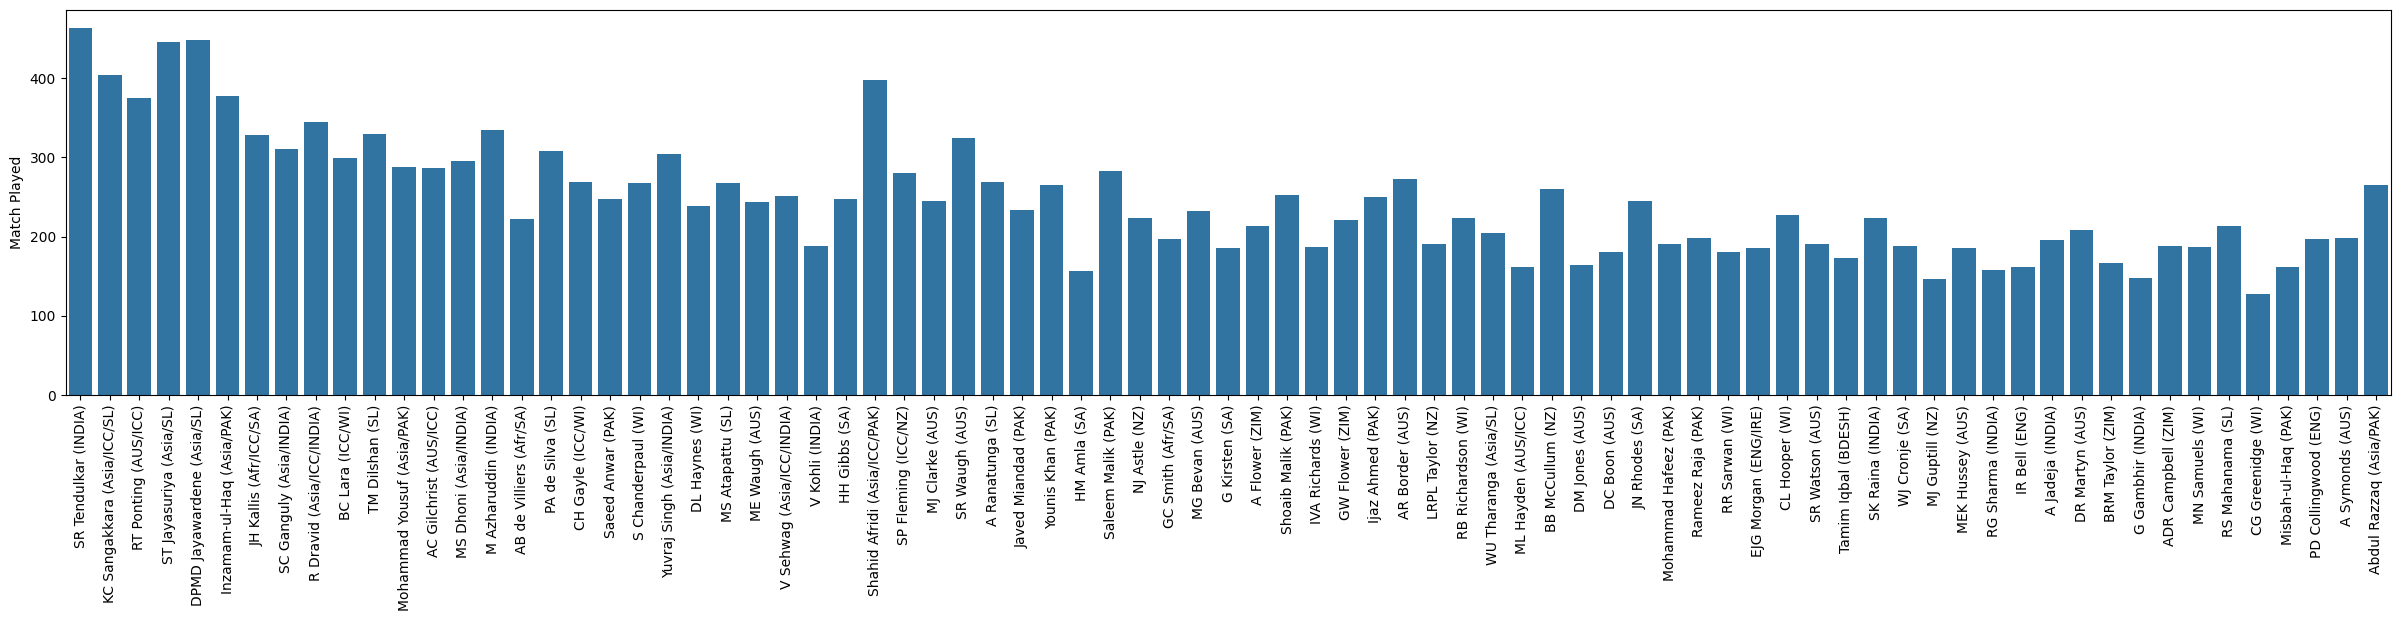

In [14]:
#Visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (30,5))
mat = df[['Player','Mat']]
ax = sns.barplot(x='Player', y='Mat', data= mat)
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()

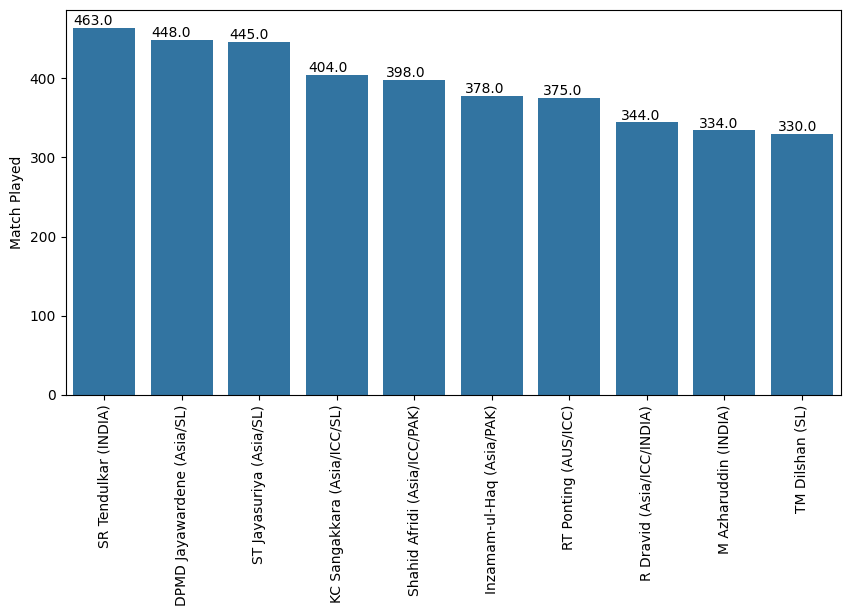

In [15]:
#Getting top 10 players according to matches played
plt.figure(figsize = (10,5))
mat_top10 = df[['Player','Mat']].sort_values('Mat', ascending = False).head(10)
ax = sns.barplot(x='Player', y='Mat', data= mat_top10)
for p in ax.patches:
     ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Homework, make a for loop to check top players in every parameter

In [17]:
# Dropping Player field as final dataframe will only contain data columns

df_drop = df.copy()
player = df_drop.pop('Player')

In [18]:
#Now let is rescale our data
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop)
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [19]:
df_df1 = pd.DataFrame(df_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])
df_df1.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900


<Axes: >

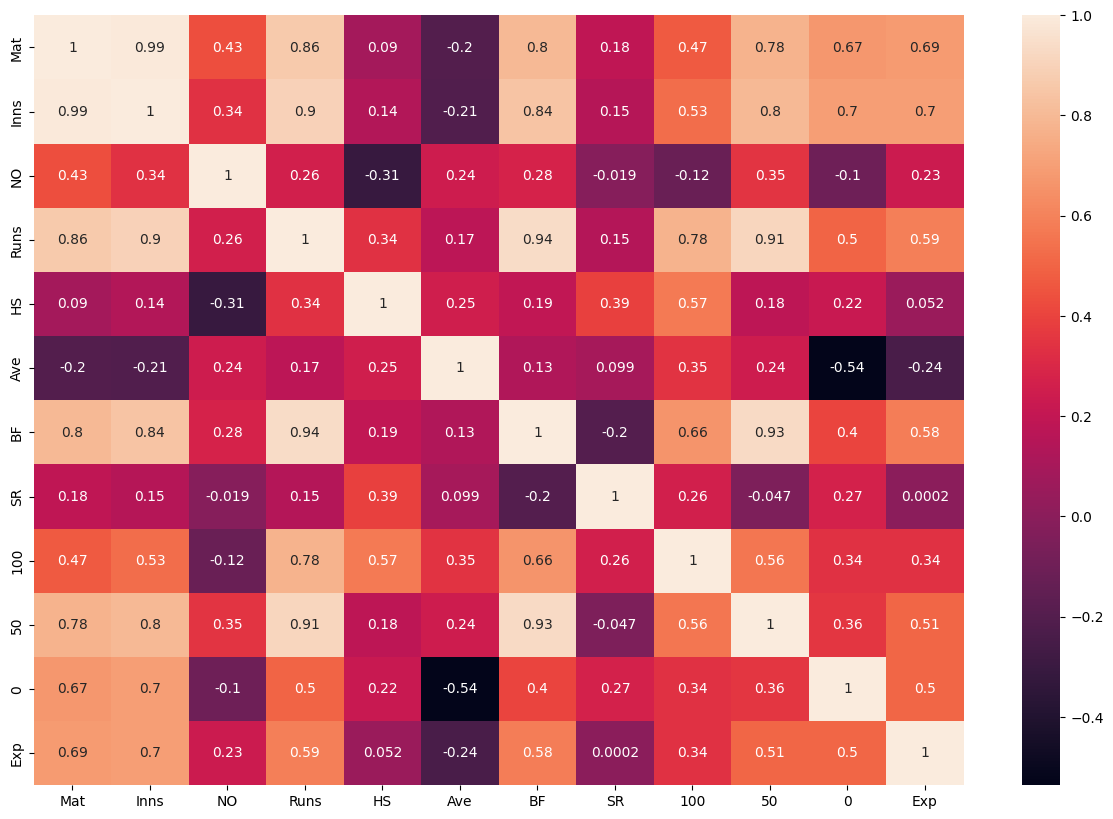

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(df_df1.corr(),annot = True)

In [21]:
df_df1.shape

(79, 12)

In [22]:
#Now start KMeans
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

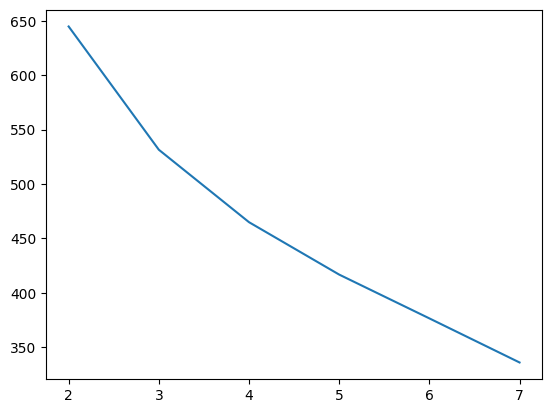

In [23]:
# Elbow curve method to find the ideal number of clusters.
clusters=list(range(2,8))
ssd = [] # sum of squared distance
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_df1)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

In [24]:
#K-means with k=4 clusters

cluster = KMeans(n_clusters=4, max_iter=150, random_state= 15)
cluster.fit(df_df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=150, n_clusters=4, random_state=15)

In [25]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 0, 0, 3, 0, 2, 3, 2,
       2, 2, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [26]:
# Assign the label

df['Cluster_Id'] = cluster.labels_
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,1
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,1
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,1
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,1
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,1


In [27]:
## Number of players in each cluster
df.Cluster_Id.value_counts(ascending=True)

1     9
3    11
2    27
0    32
Name: Cluster_Id, dtype: int64

In [28]:
first_cluster = df[(df["Cluster_Id"] == 0)]
first_cluster

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
29,MJ Clarke (AUS),245,223,44,7981,130,44.58,10104,78.98,8,58,10,12,0
37,GC Smith (Afr/SA),197,194,10,6989,141,37.98,8648,80.81,10,47,8,11,0
38,MG Bevan (AUS),232,196,67,6912,108,53.58,9320,74.16,6,46,5,10,0
40,A Flower (ZIM),213,208,16,6786,145,35.34,9097,74.59,4,55,13,11,0
46,LRPL Taylor (NZ),190,176,29,6486,131,44.12,7906,82.03,17,37,9,11,0
47,RB Richardson (WI),224,217,30,6248,122,33.41,9801,63.74,5,44,8,13,0
48,WU Tharanga (Asia/SL),204,193,14,6140,174,34.30,8183,75.03,14,34,15,12,0
51,DM Jones (AUS),164,161,25,6068,145,44.61,8362,72.56,7,46,6,10,0
52,DC Boon (AUS),181,177,16,5964,122,37.04,9157,65.13,5,37,6,11,0
53,JN Rhodes (SA),245,220,51,5935,121,35.11,7336,80.90,2,33,12,11,0


In [29]:
df_df1.iloc[:, [3, 6]]

,Runs,BF
0,4.262328,3.681214
1,2.609117,2.635385
2,2.400099,2.319651
3,2.292041,1.588295
4,1.984430,1.996354
...,...,...
74,-0.979677,-0.559768
75,-0.984410,-0.863213
76,-0.996241,-0.967512
77,-0.997819,-1.317278


In [30]:
X = df_df1.iloc[:, [3, 6]].values
X

array([[ 4.26232808,  3.68121424],
       [ 2.60911662,  2.63538469],
       [ 2.40009894,  2.31965067],
       [ 2.29204075,  1.58829472],
       [ 1.98442984,  1.99635416],
       [ 1.62515607,  1.93081256],
       [ 1.5620564 ,  1.95381514],
       [ 1.47687184,  1.80603146],
       [ 1.28993905,  1.76443775],
       [ 1.09906254,  1.07183957],
       [ 1.05370965,  0.70852488],
       [ 0.82891706,  1.02646463],
       [ 0.78908539,  0.07485112],
       [ 0.74057751,  0.3218925 ],
       [ 0.6940415 ,  0.94044129],
       [ 0.6707735 , -0.12271897],
       [ 0.65697044,  0.55412401],
       [ 0.63212495,  0.36222579],
       [ 0.47555888,  0.39499659],
       [ 0.45741773,  0.85819919],
       [ 0.42705101,  0.07548132],
       [ 0.40614924,  1.26751904],
       [ 0.35921886,  0.9168085 ],
       [ 0.34778204,  0.43123353],
       [ 0.25825938, -0.55315078],
       [ 0.20817401, -0.23079958],
       [ 0.18766662,  0.01151525],
       [ 0.17583543, -0.87991343],
       [ 0.16518736,

In [31]:
y_kmeans = cluster.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

<Axes: xlabel='Not outs', ylabel='Average'>

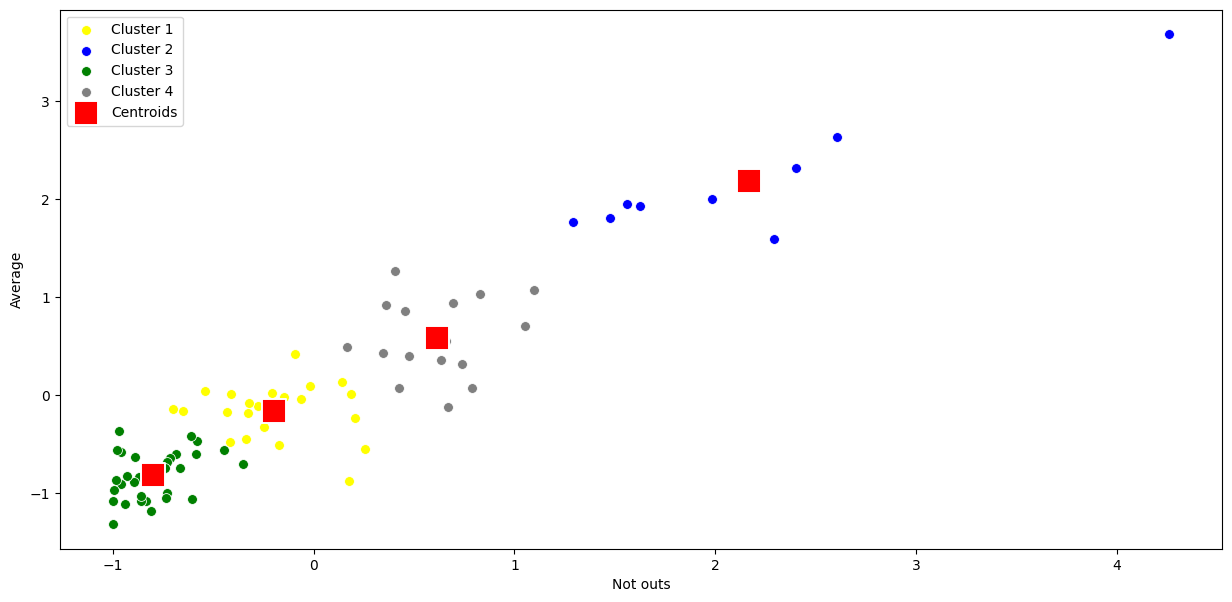

In [35]:
# scatterplot(x,y)

# Visualising the clusters
plt.figure(figsize=(15,7))
#sns.scatterplot(x, y)
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x = X[y_kmeans == 1, 0],y = X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x = X[y_kmeans == 2, 0],y =  X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x = X[y_kmeans == 3, 0],y = X[y_kmeans == 3, 1], color = 'grey',  label= 'Cluster 4',s=50)
plt.xlabel("Not outs")
plt.ylabel("Average")
sns.scatterplot( x = cluster.cluster_centers_[0:4, 0], y =  cluster.cluster_centers_[0:4, 1], color = 'red',
                label = 'Centroids',s=300,marker=',')

In [33]:
sns.scatterplot(x = X[y_kmeans == 0, 0],y =  X[y_kmeans == 0, 1], color = 'yellow',data = X, label = 'Cluster 1',s=50)


TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.ndarray'>.

<Axes: >

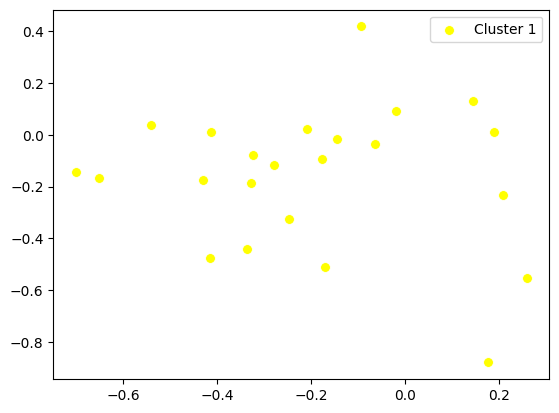

In [34]:
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='yellow', label='Cluster 1', s=50)
